# EnZymClass Results Review

1. Precision
2. Recall
3. Accuracy
4. MCC. AUPRC? AUPRC for multilabel requires predict probability for the ensemble not just the base classifiers. Plus it is primarily designed for binary classification.

In [1]:
import itertools

In [2]:
import sys
sys.path.append("../")
from utils import helper

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import FontProperties

In [4]:
import numpy as np

In [5]:
en_pred_file = "../data/results/ensemble_preds.csv"

valid_true_iter = itertools.islice(open(en_pred_file).readlines(), 0, 20000, 2)
valid_pred_iter = itertools.islice(open(en_pred_file).readlines(), 1, 20000, 2)

valid_true = [list(map(int, v.strip("\n").split(","))) for v in list(valid_true_iter)]
valid_pred = [list(map(int, v.strip("\n").split(","))) for v in list(valid_pred_iter)]

In [6]:
# creating a list of tuples, tuple values are prec, recall, acc and MCC
mets = []

for valid_iter in zip(valid_true, valid_pred):
    met = helper.get_metrics(valid_iter)
    mets.append(met)

In [7]:
prec = [m[0] for m in mets]
rec = [m[1] for m in mets]
acc = [m[2] for m in mets]
mcc = [m[3] for m in mets]

In [8]:
def get_met_plot(metrics):
    prec = [m[0] for m in metrics]
    rec = [m[1] for m in metrics]
    acc = [m[2] for m in metrics]
    mcc = [m[3] for m in metrics]
    
    fig, axs = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=True)
    
    axs[0,0].hist(prec, color="navy")
    axs[0,0].axvline(np.median(prec), color="black")
    axs[0,0].text(0.25, 3000, f"Mean: {round(np.mean(prec), 2)}\nMedian: {round(np.median(prec), 2)}\nSD: {round(np.std(prec), 2)}")
    axs[0,0].set_title("Histogram of Precision scores")
    
    axs[0,1].hist(rec, color="seagreen")
    axs[0,1].axvline(np.median(rec), color="black")
    axs[0,1].text(0.25, 3000, f"Mean: {round(np.mean(rec), 2)}\nMedian: {round(np.median(rec), 2)}\nSD: {round(np.std(rec), 2)}")
    axs[0,1].set_title("Histogram of Recall scores")
    
    axs[1,0].hist(acc, color="maroon")
    axs[1,0].axvline(np.median(acc), color="black")
    axs[1,0].text(0.25, 3000, f"Mean: {round(np.mean(acc), 2)}\nMedian: {round(np.median(acc), 2)}\nSD: {round(np.std(acc), 2)}")
    axs[1,0].set_title("Histogram of Accuracy scores")
    
    axs[1,1].hist(mcc, color="darkgoldenrod")
    axs[1,1].axvline(np.median(mcc), color="black")
    axs[1,1].text(0.25, 3000, f"Mean: {round(np.mean(mcc), 2)}\nMedian: {round(np.median(mcc), 2)}\nSD: {round(np.std(mcc), 2)}")
    axs[1,1].set_title("Histogram of MCC scores")
    
    fig.supxlabel('Metric scores', fontweight='heavy')
    fig.supylabel('Counts', fontweight='bold')
    fig.suptitle("Histograms of EnZymClass metric scores", fontweight='heavy', fontsize=12)
    
    plt.tight_layout()
    
    return

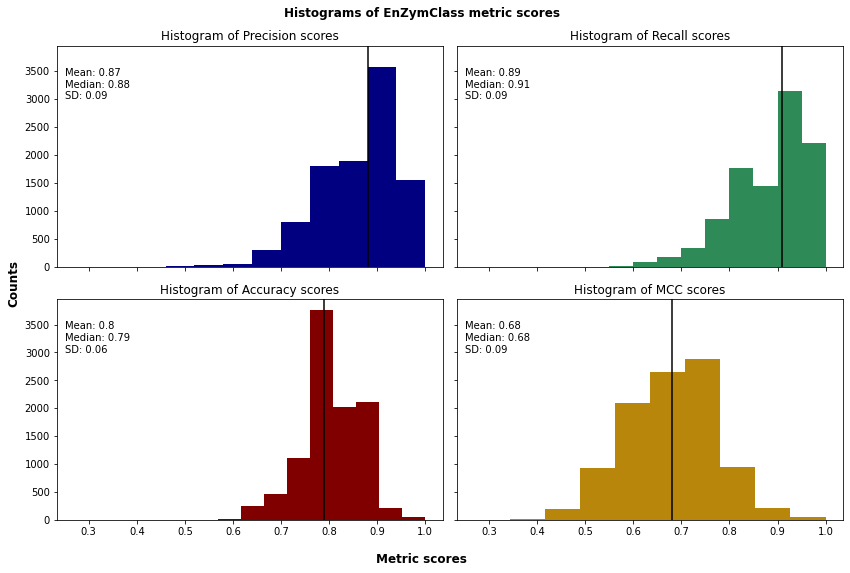

In [9]:
get_met_plot(mets)

# Label 1 and 2 metric scores

In [11]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [12]:
# creating a list of tuples, tuple values are prec, recall, acc and MCC
mets1 = []

for valid_iter in zip(valid_true, valid_pred):
    met1 = helper.get_metrics_lab1(valid_iter)
    mets1.append(met1)
    
mets2 = []

for valid_iter in zip(valid_true, valid_pred):
    met2 = helper.get_metrics_lab2(valid_iter)
    mets2.append(met2)

In [13]:
prec1 = [m[0] for m in mets1]
rec1 = [m[1] for m in mets1]

prec2 = [m[0] for m in mets2]
rec2 = [m[1] for m in mets2]

In [17]:
np.min(prec1), np.mean(prec1), np.median(prec1), np.std(prec1)

(0.36, 0.775033, 0.78, 0.10860321777461293)

In [19]:
np.min(rec1), np.mean(rec1), np.median(rec1), np.std(rec1)

(0.43, 0.9225480000000001, 0.92, 0.07844671883514313)

In [18]:
np.min(prec2), np.mean(prec2), np.median(prec2), np.std(prec2)

(0.0, 0.5410429999999999, 0.5, 0.36876781604554376)

In [20]:
np.min(rec2), np.mean(rec2), np.median(rec2), np.std(rec2)

(0.0, 0.279025, 0.25, 0.20971113316893789)

# Individual Features Comparison

In [21]:
import pandas as pd

In [23]:
indfeat_report = "../data/results/indfeatreport.csv"

In [34]:
pd.read_csv(indfeat_report, index_col=0).sort_values("mean_accuracy", ascending=False).loc[:, 
                                                                                [ "mean_precision", 
                                                                                  "min_precision", 
                                                                                  "std_precision", 
                                                                                  "mean_recall", 
                                                                                  "min_recall", 
                                                                                  "std_recall", 
                                                                                  "mean_accuracy", 
                                                                                  "min_accuracy", 
                                                                                  "std_accuracy"]]

,mean_precision,min_precision,std_precision,mean_recall,min_recall,std_recall,mean_accuracy,min_accuracy,std_accuracy
featname,,,,,,,,,
spectrumKernel,0.87,0.44,0.09,0.85,0.36,0.10,0.77,0.45,0.07
gappyKernel,0.87,0.44,0.09,0.86,0.38,0.10,0.77,0.48,0.07
cksaap,0.87,0.38,0.09,0.86,0.35,0.10,0.77,0.45,0.07
ksctriad,0.86,0.33,0.09,0.85,0.33,0.10,0.76,0.41,0.07
moran,0.87,0.33,0.10,0.85,0.38,0.10,0.76,0.45,0.08
dpc,0.87,0.43,0.09,0.85,0.36,0.10,0.76,0.45,0.07
ctriad,0.86,0.33,0.09,0.85,0.33,0.10,0.76,0.41,0.07
geary,0.87,0.33,0.10,0.84,0.38,0.10,0.75,0.41,0.07
cksaagp,0.82,0.36,0.10,0.84,0.38,0.10,0.75,0.41,0.07


In [35]:
pd.read_csv(indfeat_report, index_col=0).sort_values("mean_accuracy", ascending=False).loc[:, 
                                                                                [ "mean_precision", 
                                                                                  "mean_recall", 
                                                                                  "mean_accuracy"]]

,mean_precision,mean_recall,mean_accuracy
featname,,,
spectrumKernel,0.87,0.85,0.77
gappyKernel,0.87,0.86,0.77
cksaap,0.87,0.86,0.77
ksctriad,0.86,0.85,0.76
moran,0.87,0.85,0.76
dpc,0.87,0.85,0.76
ctriad,0.86,0.85,0.76
geary,0.87,0.84,0.75
cksaagp,0.82,0.84,0.75


# Similarity Model Results Review

1. Precision, Precision Box Plot
2. Recall, Recall Box Plot
3. Accuracy, Accuracy Box Plot

Manuscript

1. Change caption
2. Add MCC definition
3. Add a line about error rates

In [14]:
similarity_data = "../similarity/results/model_sims.csv"

prec_sim = []
rec_sim = []
acc_sim = []

with open(similarity_data, "r") as f:
    for lines in f:
        values = list(map(float, lines.strip().split(",")))
        prec_sim.append(round(values[0], 2))
        rec_sim.append(round(values[1], 2))
        acc_sim.append(round(values[2], 2))

In [166]:
def get_sim_comp(prec_sim, prec, rec_sim, rec, acc_sim, acc):
    
    fig, axs = plt.subplots(3, 2, figsize=(12,12), sharex="col", sharey="col")
    
    axs[0,0].hist(prec_sim, color="navy")
    axs[0,0].axvline(np.median(prec_sim), color="black")
    axs[0,0].text(0.275, 2750, f"Mean: {round(np.mean(prec_sim), 2)}\nMedian: {round(np.median(prec_sim), 2)}\nSD: {round(np.std(prec_sim), 2)}")
    axs[0,0].set_title("Histogram of Precision scores")

    axs[0,1].boxplot([prec_sim, prec], vert = True)
    axs[0,1].set_title("Boxplots of Precision scores")

    
    axs[1,0].hist(rec_sim, color="seagreen")
    axs[1,0].axvline(np.median(rec_sim), color="black")
    axs[1,0].text(0.275, 2750, f"Mean: {round(np.mean(rec_sim), 2)}\nMedian: {round(np.median(rec_sim), 2)}\nSD: {round(np.std(rec_sim), 2)}")
    axs[1,0].set_title("Histogram of Recall scores")

    axs[1,1].boxplot([rec_sim, rec], vert = True)
    axs[1,1].set_title("Boxplots of Recall scores")

    
    axs[2,0].hist(acc_sim, color="maroon")
    axs[2,0].axvline(np.median(acc_sim), color="black")
    axs[2,0].text(0.275, 2750, f"Mean: {round(np.mean(acc_sim), 2)}\nMedian: {round(np.median(acc_sim), 2)}\nSD: {round(np.std(acc_sim), 2)}")
    axs[2,0].set_title("Histogram of Accuracy scores")
    axs[2,0].set_xlabel("Metric scores",  fontweight='heavy')

    axs[2,1].boxplot([acc_sim, acc], vert = True)
    axs[2,1].set_title("Boxplots of Accuracy scores")
    axs[2,1].set_xlabel("Model names",  fontweight='heavy')
    axs[2,1].set_xticks([1, 2])
    axs[2,1].set_xticklabels(['Similarity Model', 'EnZymClass'])
    
    fig.text(0.5, 0.92, "Histograms of Similarity model metric scores and comparison with EnZymClass", ha="center", fontweight='heavy', fontsize=12)
    
    fig.text(0.05, 0.5, 'Counts', va='center', rotation='vertical', fontweight='heavy')
    fig.text(0.5, 0.5, 'Metric Scores', va='center', rotation='vertical', fontweight='heavy')


    return

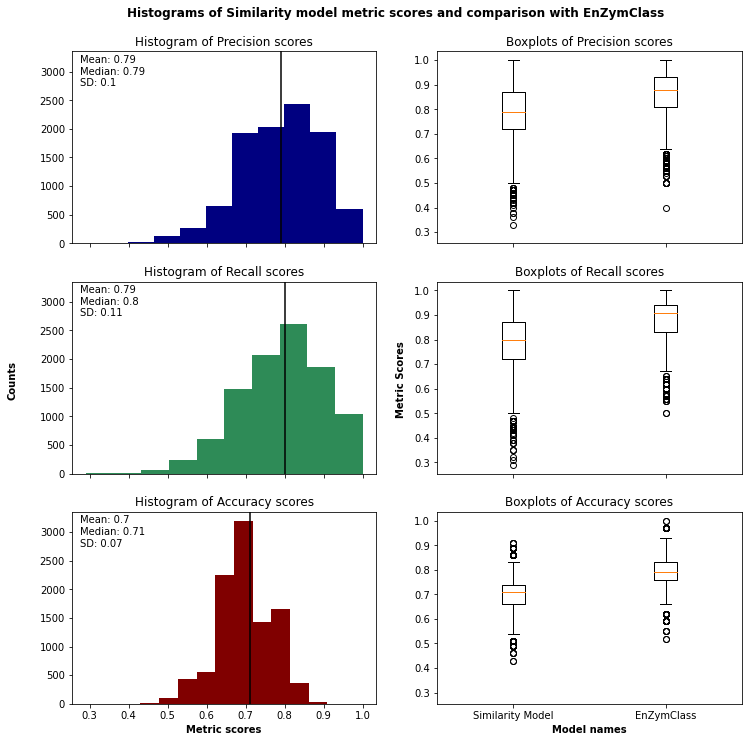

In [167]:
get_sim_comp(prec_sim, prec, rec_sim, rec, acc_sim, acc)